In [1]:
num_points = 500
rs = LinRange(0, 1, num_points)
θs = LinRange(0, 2π, num_points)
pairs = [(r, θ) for r in rs for θ in θs]
xs = [pair[1] * cos(pair[2]) for pair in pairs]
ys = [pair[1] * sin(pair[2]) for pair in pairs]
xs = LinRange(-1, 1, num_points)
ys = LinRange(-1, 1, num_points)
function f(x, y; scale=1)
    r = sqrt(x^2 + y^2)
    if r1 < r < r2
        1*scale
    else
        0
    end
end

f (generic function with 1 method)

In [2]:
interionic_spacing = .2
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = 1
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end
using Plots
gr() # We will continue onward using the GR backend
plot(x, y, seriestype = :scatter, title = "Top View of Penning Trap")
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none);

In [3]:
function plot_triangles_across_unit_disk(f, x, y)
    infids = []
    ψ1s = []
    ψ2s = []
    for (i, xx) in enumerate(x)
        ρ = sqrt(xx^2 + y[i]^2)
        ϕ = atan(y[i], xx)
        infid, ψ1, ψ2 = f(ρ, ϕ)
        push!(infids, infid)
        push!(ψ1s, ψ1)
        push!(ψ2s, ψ2)
        end
    infids, ψ1s, ψ2s
end
using SpecialFunctions
using QuantumOptics

function infidelity(ρ, σ)
    1 - abs(ρ'*σ)^2
end

infidelity (generic function with 1 method)

In [4]:
max_n = 40
function sample_across_unit_disk(f, discretization)
    x = y = Array(range(0, 1, length=discretization))
    z = Array{typeof(f(0.,0.))}(UndefInitializer(), length(x), length(y))
    for (i, xx) in enumerate(x)
        for (j, yy) in enumerate(y)
            if xx^2 + yy^2 > 1
                if typeof(f(0.,0.)) == Tuple{Float64,Float64}
                    z[i, j] = (0.,0.)
                else
                    z[i, j] = 0.
                end
            else
                ρ = sqrt(xx^2 + yy^2)
                ϕ = atan(yy, xx)
                res = f(ρ, ϕ)
                z[i, j] = res
            end
        end
    end
    x, y, z
end

sample_across_unit_disk (generic function with 1 method)

In [5]:
function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function Z(n, m, ρ, θ)
    if m < 0
        R(n, abs(m), ρ) * sin(abs(m) * θ)
    else
        R(n, m, ρ) * cos(m * θ)
    end
end

Z (generic function with 1 method)

In [70]:
vals = eval(Meta.parse(replace(replace(
                "{{{0.000430385,-0.707108},{0.000430385,0.707108}},{{0.234405,-0.667124},{0.234405,0.667124}},{{0.590606,-0.388828},{0.590606,0.388828}},{{0.697398,-0.116789},{0.697398,0.116789}},{{0.706754,-0.0223893},{0.706754,0.0223893}},{{0.70705,-0.0089852},{0.70705,0.0089852}},{{0.707009,-0.0115778},{0.707009,0.0115778}},{{0.707086,-0.00548415},{0.707086,0.00548415}},{{0.706726,-0.02325},{0.706726,0.02325}},{{0.696956,-0.119399},{0.696956,0.119399}},{{0.592436,-0.386032},{0.592436,0.386032}},{{0.25926,-0.657866},{0.25926,0.657866}},{{0.0327805,-0.706349},{0.0327805,0.706349}},{{0.234406,-0.667123},{0.234406,0.667123}},{{0.592436,-0.386033},{0.592436,0.386033}},{{0.259258,-0.657866},{0.259258,0.657866}},{{0.0327815,-0.706349},{0.0327815,0.706349}},{{0.270842,-0.653182},{0.270842,0.653182}},{{0.603584,-0.368358},{0.603584,0.368358}},{{0.70063,-0.0954969},{0.70063,0.0954969}},{{0.351417,-0.613602},{0.351417,0.613602}},{{0.129416,-0.695164},{0.129416,0.695164}},{{0.376929,-0.59827},{0.376929,0.59827}},{{0.622809,-0.334827},{0.622809,0.334827}},{{0.703286,-0.0734087},{0.703286,0.0734087}},{{0.706972,-0.013871},{0.706972,0.013871}},{{0.707096,-0.00407948},{0.707096,0.00407948}},{{0.707103,-0.00278816},{0.707103,0.00278816}},{{0.707052,0.00891762},{0.707052,-0.00891762}},{{0.707087,-0.00551887},{0.707087,0.00551887}},{{0.707021,0.0110941},{0.707021,-0.0110941}},{{0.706903,-0.0170308},{0.706903,0.0170308}},{{0.707018,0.0112223},{0.707018,-0.0112223}},{{0.707055,-0.00866388},{0.707055,0.00866388}},{{0.707079,0.00650725},{0.707079,-0.00650725}},{{0.707106,-0.00195596},{0.707106,0.00195596}},{{0.707094,0.00434507},{0.707094,-0.00434507}},{{0.706963,-0.0143634},{0.706963,0.0143634}},{{0.699905,-0.100676},{0.699905,0.100676}},{{0.606429,-0.363657},{0.606429,0.363657}},{{0.310983,-0.635053},{0.310983,0.635053}},{{0.698207,-0.111847},{0.698207,0.111847}},{{0.706814,-0.0203898},{0.706814,0.0203898}},{{0.707107,0.0000524946},{0.707107,-0.0000524946}},{{0.707106,-0.00190083},{0.707106,0.00190083}},{{0.707093,0.00464686},{0.707093,-0.00464686}},{{0.707043,-0.00958336},{0.707043,0.00958336}},{{0.707076,0.00660638},{0.707076,-0.00660638}},{{0.707086,-0.0055522},{0.707086,0.0055522}},{{0.707097,-0.00401628},{0.707097,0.00401628}},{{0.706726,-0.0232489},{0.706726,0.0232489}},{{0.696955,-0.119397},{0.696955,0.119397}},{{0.590605,-0.388829},{0.590605,0.388829}},{{0.697397,-0.116793},{0.697397,0.116793}},{{0.706754,-0.0223966},{0.706754,0.0223966}},{{0.707086,-0.00548391},{0.707086,0.00548391}},{{0.707009,-0.0115774},{0.707009,0.0115774}},{{0.707051,-0.00898986},{0.707051,0.00898986}},{{0.700629,-0.0955001},{0.700629,0.0955001}},{{0.603585,-0.368358},{0.603585,0.368358}},{{0.270842,-0.653183},{0.270842,0.653183}},{{0.129415,-0.695164},{0.129415,0.695164}},{{0.310984,-0.635053},{0.310984,0.635053}},{{0.606429,-0.363657},{0.606429,0.363657}},{{0.698209,-0.111835},{0.698209,0.111835}},{{0.706814,-0.0203932},{0.706814,0.0203932}},{{0.707098,-0.00401688},{0.707098,0.00401688}},{{0.707086,-0.00555175},{0.707086,0.00555175}},{{0.707076,0.00661534},{0.707076,-0.00661534}},{{0.707042,-0.00958463},{0.707042,0.00958463}},{{0.707093,0.00464668},{0.707093,-0.00464668}},{{0.707105,-0.00190104},{0.707105,0.00190104}},{{0.707108,0.0000499976},{0.707108,-0.0000499976}},{{0.706963,-0.0143622},{0.706963,0.0143622}},{{0.699905,-0.100676},{0.699905,0.100676}},{{0.622809,-0.334827},{0.622809,0.334827}},{{0.376929,-0.598271},{0.376929,0.598271}},{{0.703286,-0.0734081},{0.703286,0.0734081}},{{0.706972,-0.0138718},{0.706972,0.0138718}},{{0.707094,0.00434542},{0.707094,-0.00434542}},{{0.707105,-0.00195632},{0.707105,0.00195632}},{{0.707079,0.0065106},{0.707079,-0.0065106}},{{0.707055,-0.00866537},{0.707055,0.00866537}},{{0.707018,0.0112242},{0.707018,-0.0112242}},{{0.706903,-0.0170212},{0.706903,0.0170212}},{{0.707021,0.0110922},{0.707021,-0.0110922}},{{0.707087,-0.0055179},{0.707087,0.0055179}},{{0.707052,0.00891817},{0.707052,-0.00891817}},{{0.707103,-0.00278511},{0.707103,0.00278511}},{{0.707096,-0.00407948},{0.707096,0.00407948}},{{0.351418,-0.613602},{0.351418,0.613602}}}", "{"=> "["), "}"=> "]") ))
# ampdown = eval(Meta.parse(replace(replace("{{0.045645,-0.705632},{0.144864,-0.692109},{0.566591,-0.423054},{0.706906,-0.0168596},{0.69968,0.10222},{0.701632,0.0878235},{0.70004,0.0997219},{0.689691,0.15597},{0.68004,0.19377},{0.687228,0.166486},{0.699331,-0.10458},{0.144864,-0.692109},{-0.431227,-0.560396},{0.144866,-0.692109},{0.699331,-0.104574},{0.144866,-0.692109},{-0.431227,-0.560396},{-0.184454,-0.682625},{0.489668,-0.510123},{0.705063,-0.0537226},{-0.14256,-0.692587},{-0.455176,-0.541124},{-0.14256,-0.692587},{0.489666,-0.510125},{0.705063,-0.0537246},{0.69968,0.102216},{0.701631,0.0878265},{0.70004,0.0997223},{0.693749,0.136795},{0.699118,0.105995},{0.69424,0.134276},{0.704128,0.0648394},{0.69424,0.134276},{0.697137,0.118321},{0.687292,0.166222},{0.689492,0.156848},{0.689691,0.155968},{0.680039,0.193771},{0.706906,-0.0168594},{0.566591,-0.423055},{-0.184453,-0.682626},{0.687228,0.166487},{0.648732,0.281331},{0.670661,0.224085},{0.680687,0.191483},{0.687292,0.166222},{0.699118,0.105995},{0.693749,0.136795},{0.689492,0.156848},{0.670661,0.224085},{0.680039,0.193771},{0.687228,0.166487},{0.566591,-0.423055},{0.706906,-0.0168594},{0.69968,0.102216},{0.689691,0.155968},{0.70004,0.0997223},{0.701631,0.0878265},{0.705063,-0.0537246},{0.489666,-0.510125},{-0.184453,-0.682626},{-0.455176,-0.541124},{-0.184454,-0.682625},{0.566591,-0.423054},{0.687228,0.166486},{0.648731,0.281332},{0.670662,0.224082},{0.689492,0.156847},{0.693748,0.136799},{0.699119,0.105988},{0.687292,0.166222},{0.680688,0.191479},{0.670662,0.224082},{0.68004,0.19377},{0.706906,-0.0168596},{0.489668,-0.510123},{-0.14256,-0.692587},{0.705063,-0.0537226},{0.69968,0.10222},{0.689691,0.15597},{0.689492,0.156847},{0.687292,0.166222},{0.697137,0.118322},{0.694241,0.134273},{0.704127,0.0648485},{0.694241,0.134273},{0.699119,0.105988},{0.693748,0.136799},{0.70004,0.0997219},{0.701632,0.0878235},{-0.14256,-0.692587}}", "{"=> "["), "}"=> "]") ))
ampsup = []
ampsdown = []
for v in vals
    push!(ampsup, v[1][1] + 1im*v[1][2])
    push!(ampsdown, v[2][1] + 1im*v[2][2])
end
sigmaxex = [2*real(conj(x) * ampsdown[i]) for (i, x) in enumerate(ampsup)]

91-element Array{Float64,1}:
 -1.0000030768655035
 -0.7802174547020002
  0.3952564673039999
  0.9454485997659998
  0.9979998715230199
  0.9996779373619199
  0.99945536125632
  0.9998810709895549
  0.9978421531519999
  0.9429830894700001
  0.4039194181439999
 -0.7311438527119999
 -0.9957086972415
  ⋮
  0.9999260843220472
  0.9999873076741151
  0.9998366486572801
  0.9997033687755262
  0.9994969393167201
  0.9988442603191199
  0.9995113150803201
  0.9998831566971801
  0.9996859938957022
  0.9999737915425759
  0.999936222117859
 -0.50602560736

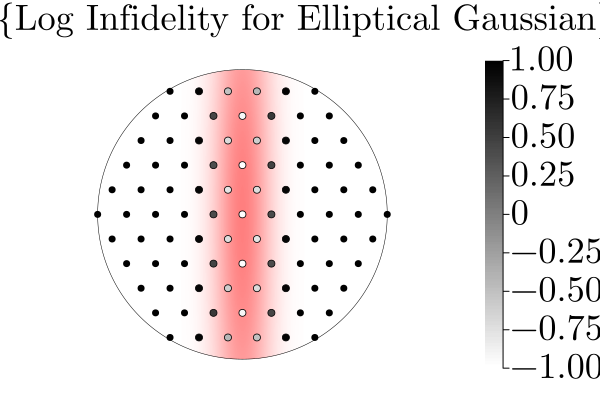

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


In [71]:
σ1 = .2
σ2 = 2
using LaTeXStrings

function gaussian(σ1, σ2)
    function func(x, y)
        if x^2 + y^2 > (1)^2
            -1
        else
        2*exp(-x^2/σ1^2 + -y^2/σ2^2) - 1
        end
    end
end


p = palette([:white, :black], 100);
scale = 1
plot(heatmap(xs, ys, gaussian(σ1, σ2); c=palette([:white, :red], 100), alpha=.5))
scatter!(scale*x, scale*y, marker_z = sigmaxex, c=p)
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Log Infidelity for Elliptical Gaussian}", fontfamily="Computer Modern", right_margin = 15Plots.mm)

In [72]:
function gaussian(σ1, σ2)
    function func(x, y)
        1/sqrt(2) * [exp(-1.0im * π/2 * exp(-x^2/σ1^2 + -y^2/σ2^2)), exp(1.0im * π/2 * exp(-x^2/σ1^2 + -y^2/σ2^2))]
    end
end

ϕ = [gaussian(σ1, σ2)(xx, y[i]) for (i, xx) in enumerate(x)];
ψ = [[amp/sqrt(norm(amp)^2 + norm(ampsdown[i])^2), ampsdown[i]/sqrt(norm(amp)^2 + norm(ampsdown[i])^2)] for (i, amp) in enumerate(ampsup)];
z1 = infidsparallel = Float64.([infidelity(ϕϕ, ψ[i]) for (i, ϕϕ) in enumerate(ϕ)]);
σ1 = .2
σ2 = 2
using LaTeXStrings


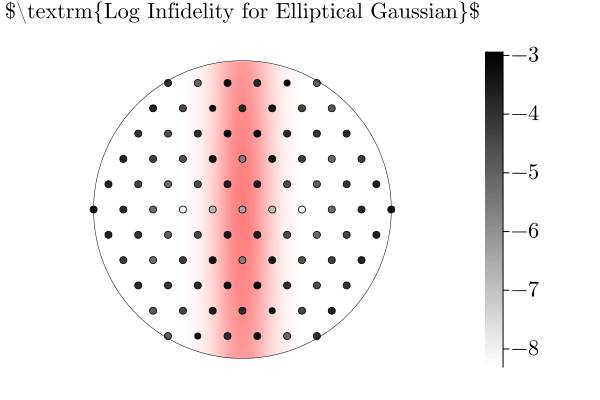

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


In [38]:
function gaussian(σ1, σ2, z)
    function func(x, y)
        if x^2 + y^2 > (1)^2
            minimum(loginfids)
        else
            (maximum(log.(10, z)) -minimum(loginfids))*exp(-x^2/σ1^2 + -y^2/σ2^2)  +minimum(loginfids)
        end
    end
end


p = palette([:white, :black], 100);
scale = 1
loginfids = [log(10, Real(infid)) for infid in z1]
plot(heatmap(xs, ys, gaussian(σ1, σ2, z1); c=palette([:white, :red], 100), alpha=.5))
scatter!(scale*x, scale*y, marker_z = loginfids, c=p)
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Log Infidelity for Elliptical Gaussian}", fontfamily="Computer Modern", right_margin = 15Plots.mm)

#2610

In [6]:
vals = eval(Meta.parse(replace(replace(
                "{{{0.00197849,-0.707105},{0.00197849,0.707105}},{{0.222708,-0.67112},{0.222708,0.67112}},{{0.582824,-0.400396},{0.582824,0.400396}},{{0.697266,-0.117558},{0.697266,0.117558}},{{0.707107,-0.000850993},{0.707107,0.000850993}},{{0.706386,0.0319168},{0.706386,-0.0319168}},{{0.705955,-0.0403434},{0.705955,0.0403434}},{{0.706584,-0.027207},{0.706584,0.027207}},{{0.706435,-0.0308273},{0.706435,0.0308273}},{{0.696382,-0.122689},{0.696382,0.122689}},{{0.59272,-0.385597},{0.59272,0.385597}},{{0.272312,-0.652569},{0.272312,0.652569}},{{0.0360159,-0.70619},{0.0360159,0.70619}},{{0.222708,-0.67112},{0.222708,0.67112}},{{0.59272,-0.385596},{0.59272,0.385596}},{{0.272311,-0.652569},{0.272311,0.652569}},{{0.0360173,-0.706189},{0.0360173,0.706189}},{{0.251685,-0.660799},{0.251685,0.660799}},{{0.584179,-0.398413},{0.584179,0.398413}},{{0.694924,-0.130695},{0.694924,0.130695}},{{0.3496,-0.614638},{0.3496,0.614638}},{{0.146155,-0.691837},{0.146155,0.691837}},{{0.390235,-0.589675},{0.390235,0.589675}},{{0.624466,-0.331725},{0.624466,0.331725}},{{0.702352,-0.0818756},{0.702352,0.0818756}},{{0.70691,0.0166795},{0.70691,-0.0166795}},{{0.705842,0.0422732},{0.705842,-0.0422732}},{{0.706516,-0.0288857},{0.706516,0.0288857}},{{0.706699,0.0240077},{0.706699,-0.0240077}},{{0.707097,-0.00370345},{0.707097,0.00370345}},{{0.70704,-0.00969168},{0.70704,0.00969168}},{{0.706518,0.028855},{0.706518,-0.028855}},{{0.706939,-0.0153854},{0.706939,0.0153854}},{{0.706862,0.01861},{0.706862,-0.01861}},{{0.707045,-0.00929599},{0.707045,0.00929599}},{{0.706939,0.0154049},{0.706939,-0.0154049}},{{0.707048,-0.00908792},{0.707048,0.00908792}},{{0.707037,-0.00998195},{0.707037,0.00998195}},{{0.701944,-0.0852953},{0.701944,0.0852953}},{{0.614349,-0.350109},{0.614349,0.350109}},{{0.328879,-0.625971},{0.328879,0.625971}},{{0.698871,-0.10761},{0.698871,0.10761}},{{0.706842,-0.0193745},{0.706842,0.0193745}},{{0.707106,-0.00145182},{0.707106,0.00145182}},{{0.707078,0.0063903},{0.707078,-0.0063903}},{{0.706948,-0.0149967},{0.706948,0.0149967}},{{0.707096,-0.003899},{0.707096,0.003899}},{{0.707009,0.0116735},{0.707009,-0.0116735}},{{0.707054,0.00864445},{0.707054,-0.00864445}},{{0.707075,-0.00674798},{0.707075,0.00674798}},{{0.706435,-0.0308277},{0.706435,0.0308277}},{{0.696383,-0.122688},{0.696383,0.122688}},{{0.582823,-0.400395},{0.582823,0.400395}},{{0.697267,-0.117559},{0.697267,0.117559}},{{0.707107,-0.000849711},{0.707107,0.000849711}},{{0.706584,-0.027208},{0.706584,0.027208}},{{0.705956,-0.0403236},{0.705956,0.0403236}},{{0.706386,0.0319168},{0.706386,-0.0319168}},{{0.694924,-0.130696},{0.694924,0.130696}},{{0.584179,-0.398413},{0.584179,0.398413}},{{0.251685,-0.660798},{0.251685,0.660798}},{{0.146156,-0.691837},{0.146156,0.691837}},{{0.32888,-0.62597},{0.32888,0.62597}},{{0.614349,-0.350109},{0.614349,0.350109}},{{0.698871,-0.107609},{0.698871,0.107609}},{{0.706842,-0.0193746},{0.706842,0.0193746}},{{0.707075,-0.00674861},{0.707075,0.00674861}},{{0.707055,0.00864463},{0.707055,-0.00864463}},{{0.707009,0.0116708},{0.707009,-0.0116708}},{{0.707096,-0.003899},{0.707096,0.003899}},{{0.706947,-0.0149953},{0.706947,0.0149953}},{{0.707078,0.00639105},{0.707078,-0.00639105}},{{0.707106,-0.00145243},{0.707106,0.00145243}},{{0.707037,-0.00998117},{0.707037,0.00998117}},{{0.701944,-0.0852942},{0.701944,0.0852942}},{{0.624466,-0.331725},{0.624466,0.331725}},{{0.390235,-0.589675},{0.390235,0.589675}},{{0.702352,-0.0818756},{0.702352,0.0818756}},{{0.70691,0.0166795},{0.70691,-0.0166795}},{{0.707048,-0.00908653},{0.707048,0.00908653}},{{0.706939,0.0154055},{0.706939,-0.0154055}},{{0.707045,-0.00929599},{0.707045,0.00929599}},{{0.706862,0.0186106},{0.706862,-0.0186106}},{{0.70694,-0.0153867},{0.70694,0.0153867}},{{0.706518,0.0288555},{0.706518,-0.0288555}},{{0.70704,-0.00969117},{0.70704,0.00969117}},{{0.707097,-0.00370246},{0.707097,0.00370246}},{{0.706699,0.0240077},{0.706699,-0.0240077}},{{0.706517,-0.0288852},{0.706517,0.0288852}},{{0.705842,0.0422728},{0.705842,-0.0422728}},{{0.3496,-0.614638},{0.3496,0.614638}}}", "{"=> "["), "}"=> "]") ))
# ampdown = eval(Meta.parse(replace(replace("{{0.045645,-0.705632},{0.144864,-0.692109},{0.566591,-0.423054},{0.706906,-0.0168596},{0.69968,0.10222},{0.701632,0.0878235},{0.70004,0.0997219},{0.689691,0.15597},{0.68004,0.19377},{0.687228,0.166486},{0.699331,-0.10458},{0.144864,-0.692109},{-0.431227,-0.560396},{0.144866,-0.692109},{0.699331,-0.104574},{0.144866,-0.692109},{-0.431227,-0.560396},{-0.184454,-0.682625},{0.489668,-0.510123},{0.705063,-0.0537226},{-0.14256,-0.692587},{-0.455176,-0.541124},{-0.14256,-0.692587},{0.489666,-0.510125},{0.705063,-0.0537246},{0.69968,0.102216},{0.701631,0.0878265},{0.70004,0.0997223},{0.693749,0.136795},{0.699118,0.105995},{0.69424,0.134276},{0.704128,0.0648394},{0.69424,0.134276},{0.697137,0.118321},{0.687292,0.166222},{0.689492,0.156848},{0.689691,0.155968},{0.680039,0.193771},{0.706906,-0.0168594},{0.566591,-0.423055},{-0.184453,-0.682626},{0.687228,0.166487},{0.648732,0.281331},{0.670661,0.224085},{0.680687,0.191483},{0.687292,0.166222},{0.699118,0.105995},{0.693749,0.136795},{0.689492,0.156848},{0.670661,0.224085},{0.680039,0.193771},{0.687228,0.166487},{0.566591,-0.423055},{0.706906,-0.0168594},{0.69968,0.102216},{0.689691,0.155968},{0.70004,0.0997223},{0.701631,0.0878265},{0.705063,-0.0537246},{0.489666,-0.510125},{-0.184453,-0.682626},{-0.455176,-0.541124},{-0.184454,-0.682625},{0.566591,-0.423054},{0.687228,0.166486},{0.648731,0.281332},{0.670662,0.224082},{0.689492,0.156847},{0.693748,0.136799},{0.699119,0.105988},{0.687292,0.166222},{0.680688,0.191479},{0.670662,0.224082},{0.68004,0.19377},{0.706906,-0.0168596},{0.489668,-0.510123},{-0.14256,-0.692587},{0.705063,-0.0537226},{0.69968,0.10222},{0.689691,0.15597},{0.689492,0.156847},{0.687292,0.166222},{0.697137,0.118322},{0.694241,0.134273},{0.704127,0.0648485},{0.694241,0.134273},{0.699119,0.105988},{0.693748,0.136799},{0.70004,0.0997219},{0.701632,0.0878235},{-0.14256,-0.692587}}", "{"=> "["), "}"=> "]") ))
ampsup = []
ampsdown = []
for v in vals
    push!(ampsup, v[1][1] + 1im*v[1][2])
    push!(ampsdown, v[2][1] + 1im*v[2][2])
end
sigmaxex = [2*real(conj(x) * ampsdown[i]) for (i, x) in enumerate(ampsup)]


91-element Array{Float64,1}:
 -0.9999871332046397
 -0.8016064022720002
  0.3587337163200001
  0.9447199827840002
  0.9999991705198281
  0.9959249977475199
  0.99348974420288
  0.997041456414
  0.9962001735994201
  0.9397905984059998
  0.405263903982
 -0.7033849488339998
 -0.99481434209438
  ⋮
  0.9996686185531182
  0.9990508405815
  0.9996524331898399
  0.99861506522328
  0.9990548261262201
  0.9966700888875
  0.9996232856480621
  0.9999449183978968
  0.99769421388342
  0.9966638330199199
  0.9928518786883199
 -0.511119422088

In [7]:
function gaussian(σ1, σ2)
    function func(x, y)
        1/sqrt(2) * [exp(-1.0im * π/2 * exp(-x^2/σ1^2 + -y^2/σ2^2)), exp(1.0im * π/2 * exp(-x^2/σ1^2 + -y^2/σ2^2))]
    end
end

ϕ = [gaussian(σ1, σ2)(xx, y[i]) for (i, xx) in enumerate(x)];
ψ = [[amp/sqrt(norm(amp)^2 + norm(ampsdown[i])^2), ampsdown[i]/sqrt(norm(amp)^2 + norm(ampsdown[i])^2)] for (i, amp) in enumerate(ampsup)];
z2 = infidsparallel = Float64.([infidelity(ϕϕ, ψ[i]) for (i, ϕϕ) in enumerate(ϕ)]);
σ1 = .2
σ2 = 2
using LaTeXStrings


LoadError: [91mUndefVarError: σ1 not defined[39m

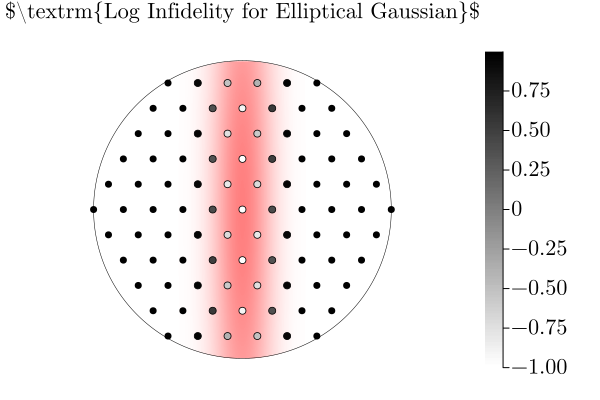

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


In [60]:
σ1 = .2
σ2 = 2
using LaTeXStrings

function gaussian(σ1, σ2)
    function func(x, y)
        if x^2 + y^2 > (1)^2
            -1
        else
        2*exp(-x^2/σ1^2 + -y^2/σ2^2) - 1
        end
    end
end


p = palette([:white, :black], 100);
scale = 1
plot(heatmap(xs, ys, gaussian(σ1, σ2); c=palette([:white, :red], 100), alpha=.5))
scatter!(scale*x, scale*y, marker_z = sigmaxex, c=p)
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Log Infidelity for Elliptical Gaussian}", fontfamily="Computer Modern", right_margin = 15Plots.mm)

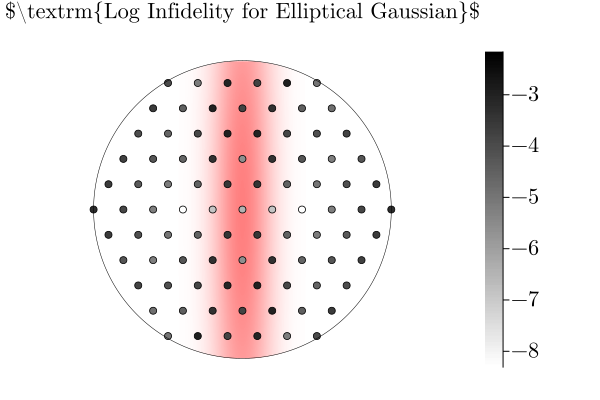

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


In [61]:
function gaussian(σ1, σ2, z)
    function func(x, y)
        if x^2 + y^2 > (1)^2
            minimum(loginfids)
        else
            (maximum(log.(10, z)) -minimum(loginfids))*exp(-x^2/σ1^2 + -y^2/σ2^2)  +minimum(loginfids)
        end
    end
end


p = palette([:white, :black], 100);
scale = 1
loginfids = [log(10, Real(infid)) for infid in z1]
plot(heatmap(xs, ys, gaussian(σ1, σ2, z2); c=palette([:white, :red], 100), alpha=.5))
scatter!(scale*x, scale*y, marker_z = loginfids, c=p)
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Log Infidelity for Elliptical Gaussian}", fontfamily="Computer Modern", right_margin = 15Plots.mm)

In [50]:
maximum(z2)

0.00700055664725685

In [63]:
scalefontsizes(1.3)
scalefontsizes(1.3)

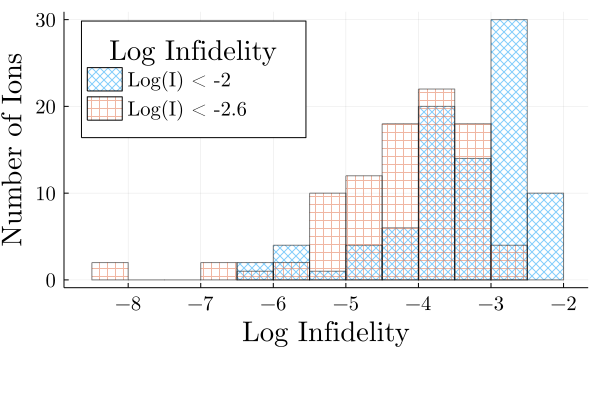

In [64]:
histogram(log.(10, z2), alpha=.5, label="Log(I) < -2", legendfontsize=12, fillstyle=:x)
histogram!(log.(10, z1), alpha=.5, label="Log(I) < -2.6", xlabel="Log Infidelity", ylabel="Number of Ions", fontfamily="Computer Modern", bottom_margin = 15Plots.mm, legend=:topleft, fillstyle=:+, nbins=10, legendtitle="Log Infidelity")



#displaced

In [6]:
vals = eval(Meta.parse(replace(replace(
                "{{0.707108,-0.000541157},{0.707108,0.000541157}},{{0.707108,-0.000278382},{0.707108,0.000278382}},{{0.707105,0.00191939},{0.707105,-0.00191939}},{{0.707108,0.000295175},{0.707108,-0.000295175}},{{0.707108,-0.000531949},{0.707108,0.000531949}},{{0.707108,-0.000706189},{0.707108,0.000706189}},{{0.707108,-0.000698965},{0.707108,0.000698965}},{{0.707108,0.00011576},{0.707108,-0.00011576}},{{0.707107,-0.000836856},{0.707107,0.000836856}},{{0.707072,0.00708264},{0.707072,-0.00708264}},{{0.706813,-0.0204354},{0.706813,0.0204354}},{{0.706796,-0.0210125},{0.706796,0.0210125}},{{0.707064,-0.00792004},{0.707064,0.00792004}},{{0.707108,-0.000281338},{0.707108,0.000281338}},{{0.707108,-0.000734332},{0.707108,0.000734332}},{{0.707108,-0.000718591},{0.707108,0.000718591}},{{0.707102,0.00299915},{0.707102,-0.00299915}},{{0.707108,0.000727579},{0.707108,-0.000727579}},{{0.707108,-0.0000339592},{0.707108,0.0000339592}},{{0.707108,0.0000589465},{0.707108,-0.0000589465}},{{0.707108,0.0000900385},{0.707108,-0.0000900385}},{{0.707108,-0.000693735},{0.707108,0.000693735}},{{0.707108,0.000042659},{0.707108,-0.000042659}},{{0.707108,0.000388137},{0.707108,-0.000388137}},{{0.707108,-5.44433*10^-6},{0.707108,5.44433*10^-6}},{{0.707109,-0.000104327},{0.707109,0.000104327}},{{0.707108,-0.00050845},{0.707108,0.00050845}},{{0.707108,0.0000561743},{0.707108,-0.0000561743}},{{0.707108,0.000131346},{0.707108,-0.000131346}},{{0.707108,0.0000578071},{0.707108,-0.0000578071}},{{0.707108,0.00046451},{0.707108,-0.00046451}},{{0.707106,-0.0015239},{0.707106,0.0015239}},{{0.707108,-0.000582921},{0.707108,0.000582921}},{{0.707108,-0.000222494},{0.707108,0.000222494}},{{0.707108,-0.000429854},{0.707108,0.000429854}},{{0.707108,-0.0000664179},{0.707108,0.0000664179}},{{0.707108,-0.000485346},{0.707108,0.000485346}},{{0.707108,0.000463092},{0.707108,-0.000463092}},{{0.707108,-0.000111618},{0.707108,0.000111618}},{{0.707107,0.000917166},{0.707107,-0.000917166}},{{0.707108,-0.0000866614},{0.707108,0.0000866614}},{{0.707107,-0.001289},{0.707107,0.001289}},{{0.707108,-0.000311774},{0.707108,0.000311774}},{{0.707107,0.000519816},{0.707107,-0.000519816}},{{0.707108,-0.0000685823},{0.707108,0.0000685823}},{{0.707108,0.0000140777},{0.707108,-0.0000140777}},{{0.707108,-0.000151504},{0.707108,0.000151504}},{{0.707108,0.0000366091},{0.707108,-0.0000366091}},{{0.707108,-0.000643822},{0.707108,0.000643822}},{{0.707108,-0.000146327},{0.707108,0.000146327}},{{0.707107,0.000805885},{0.707107,-0.000805885}},{{0.707106,-0.00188676},{0.707106,0.00188676}},{{0.707101,-0.0030614},{0.707101,0.0030614}},{{0.707108,0.000450987},{0.707108,-0.000450987}},{{0.707108,-0.000661371},{0.707108,0.000661371}},{{0.707108,-0.000293806},{0.707108,0.000293806}},{{0.707108,-0.000196309},{0.707108,0.000196309}},{{0.707107,-0.000902263},{0.707107,0.000902263}},{{0.707108,-0.000462329},{0.707108,0.000462329}},{{0.707108,0.000169107},{0.707108,-0.000169107}},{{0.707108,-0.000792271},{0.707108,0.000792271}},{{0.707108,-0.000170833},{0.707108,0.000170833}},{{0.707108,-0.000288578},{0.707108,0.000288578}},{{0.706157,-0.036666},{0.706157,0.036666}},{{0.020367,-0.706815},{0.020367,0.706815}},{{0.706993,-0.0127594},{0.706993,0.0127594}},{{0.707108,0.00026409},{0.707108,-0.00026409}},{{0.707108,-0.000353127},{0.707108,0.000353127}},{{0.707108,-0.000479656},{0.707108,0.000479656}},{{0.707108,0.000574511},{0.707108,-0.000574511}},{{0.707108,0.000743595},{0.707108,-0.000743595}},{{0.707106,-0.00145183},{0.707106,0.00145183}},{{0.706759,-0.0222198},{0.706759,0.0222198}},{{0.706585,-0.0272107},{0.706585,0.0272107}},{{0.707106,-0.00158817},{0.707106,0.00158817}},{{0.707108,0.000572317},{0.707108,-0.000572317}},{{0.707108,-0.00035704},{0.707108,0.00035704}},{{0.707108,0.000230805},{0.707108,-0.000230805}},{{0.707108,0.0000712466},{0.707108,-0.0000712466}},{{0.707108,0.000658514},{0.707108,-0.000658514}},{{0.707108,0.000099656},{0.707108,-0.000099656}},{{0.707109,0.000320573},{0.707109,-0.000320573}},{{0.707108,-0.000537028},{0.707108,0.000537028}},{{0.707108,0.000660632},{0.707108,-0.000660632}},{{0.707103,-0.00265989},{0.707103,0.00265989}},{{0.707108,-0.00040874},{0.707108,0.00040874}},{{0.707108,-0.000092759},{0.707108,0.000092759}},{{0.707108,-0.000302706},{0.707108,0.000302706}},{{0.707108,-0.000306883},{0.707108,0.000306883}},{{0.707108,-0.000800933},{0.707108,0.000800933}},{{0.707108,0.000171701},{0.707108,-0.000171701}}", "{"=> "["), "}"=> "]") ))
# ampdown = eval(Meta.parse(replace(replace("{{0.045645,-0.705632},{0.144864,-0.692109},{0.566591,-0.423054},{0.706906,-0.0168596},{0.69968,0.10222},{0.701632,0.0878235},{0.70004,0.0997219},{0.689691,0.15597},{0.68004,0.19377},{0.687228,0.166486},{0.699331,-0.10458},{0.144864,-0.692109},{-0.431227,-0.560396},{0.144866,-0.692109},{0.699331,-0.104574},{0.144866,-0.692109},{-0.431227,-0.560396},{-0.184454,-0.682625},{0.489668,-0.510123},{0.705063,-0.0537226},{-0.14256,-0.692587},{-0.455176,-0.541124},{-0.14256,-0.692587},{0.489666,-0.510125},{0.705063,-0.0537246},{0.69968,0.102216},{0.701631,0.0878265},{0.70004,0.0997223},{0.693749,0.136795},{0.699118,0.105995},{0.69424,0.134276},{0.704128,0.0648394},{0.69424,0.134276},{0.697137,0.118321},{0.687292,0.166222},{0.689492,0.156848},{0.689691,0.155968},{0.680039,0.193771},{0.706906,-0.0168594},{0.566591,-0.423055},{-0.184453,-0.682626},{0.687228,0.166487},{0.648732,0.281331},{0.670661,0.224085},{0.680687,0.191483},{0.687292,0.166222},{0.699118,0.105995},{0.693749,0.136795},{0.689492,0.156848},{0.670661,0.224085},{0.680039,0.193771},{0.687228,0.166487},{0.566591,-0.423055},{0.706906,-0.0168594},{0.69968,0.102216},{0.689691,0.155968},{0.70004,0.0997223},{0.701631,0.0878265},{0.705063,-0.0537246},{0.489666,-0.510125},{-0.184453,-0.682626},{-0.455176,-0.541124},{-0.184454,-0.682625},{0.566591,-0.423054},{0.687228,0.166486},{0.648731,0.281332},{0.670662,0.224082},{0.689492,0.156847},{0.693748,0.136799},{0.699119,0.105988},{0.687292,0.166222},{0.680688,0.191479},{0.670662,0.224082},{0.68004,0.19377},{0.706906,-0.0168596},{0.489668,-0.510123},{-0.14256,-0.692587},{0.705063,-0.0537226},{0.69968,0.10222},{0.689691,0.15597},{0.689492,0.156847},{0.687292,0.166222},{0.697137,0.118322},{0.694241,0.134273},{0.704127,0.0648485},{0.694241,0.134273},{0.699119,0.105988},{0.693748,0.136799},{0.70004,0.0997219},{0.701632,0.0878235},{-0.14256,-0.692587}}", "{"=> "["), "}"=> "]") ))
ampsup = []
ampsdown = []
for v in vals
    push!(ampsup, v[1][1] + 1im*v[1][2])
    push!(ampsdown, v[2][1] + 1im*v[2][2])
end
sigmaxex = [2*real(conj(x) * ampsdown[i]) for (i, x) in enumerate(ampsup)]


91-element Array{Float64,1}:
 1.0000028616262027
 1.000003292334924
 0.9999875939340558
 1.0000032730714388
 1.0000028813885227
 1.0000024499221924
 1.0000024702238575
 1.0000034205272448
 0.9999992182420707
 0.9998012987892608
 0.99833402279168
 0.9982381209194999
 0.9997535461247968
 ⋮
 1.0000025800466235
 1.0000034274653633
 1.0000060702279034
 1.0000028705298545
 1.000002574458721
 0.9999751551883759
 1.0000031131912248
 1.0000034301195357
 1.0000032640661551
 1.0000032589736485
 1.000002164340659
 1.000003388365533

In [7]:
function gaussian(σ1, σ2)
    function func(x, y)
        y -= .1*sqrt(3)
        x -= .3
        1/sqrt(2) * [exp(-1.0im * π/2 * exp(-x^2/σ1^2 + -y^2/σ2^2)), exp(1.0im * π/2 * exp(-x^2/σ1^2 + -y^2/σ2^2))]
    end
end

σ1 = .1
σ2 = .1
ϕ = [gaussian(σ1, σ2)(xx, y[i]) for (i, xx) in enumerate(x)];
ψ = [[amp/sqrt(norm(amp)^2 + norm(ampsdown[i])^2), ampsdown[i]/sqrt(norm(amp)^2 + norm(ampsdown[i])^2)] for (i, amp) in enumerate(ampsup)];
z1 = infidsparallel = Float64.([infidelity(ϕϕ, ψ[i]) for (i, ϕϕ) in enumerate(ϕ)]);

using LaTeXStrings


In [6]:
scalefontsizes(1.3)
scalefontsizes(1.3)

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


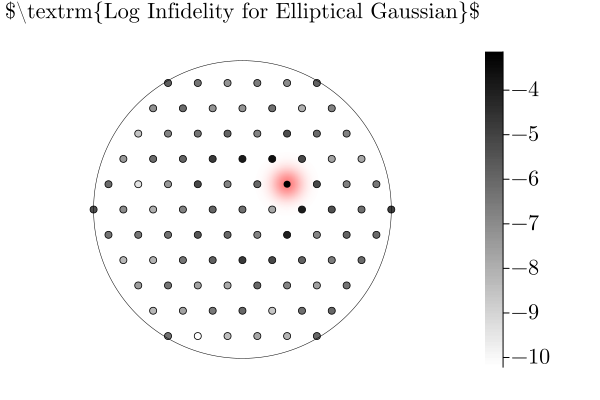

In [8]:
function gaussian(σ1, σ2, z)
    function func(x, y)
        if x^2 + y^2 > (1)^2
            minimum(loginfids)
        else
            y -= .1*sqrt(3)
            x -= .3
            (maximum(log.(10, z)) - minimum(loginfids))*exp(-x^2/σ1^2 + -y^2/σ2^2) + minimum(loginfids)
        end
    end
end



p = palette([:white, :black], 100);
scale = 1
loginfids = [log(10, Real(infid)) for infid in z1]
loginfids = [l for l in loginfids]
plot(heatmap(xs, ys, gaussian(σ1, σ2, z1); c=palette([:white, :red], 100), alpha=.5))
scatter!(scale*x, scale*y, marker_z = loginfids, c=p)
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Log Infidelity for Elliptical Gaussian}", fontfamily="Computer Modern", right_margin = 15Plots.mm)

In [8]:
maximum(loginfids)

-3.1311472054250133

In [8]:
vals = eval(Meta.parse(replace(replace(
                "{{{0.707107,-0.000544389},{0.707107,0.000544389}},{{0.707106,-0.00118534},{0.707106,0.00118534}},{{0.707003,-0.0121648},{0.707003,0.0121648}},{{0.707107,0.0000576526},{0.707107,-0.0000576526}},{{0.707106,-6.61746*10^-6},{0.707106,6.61746*10^-6}},{{0.707107,0.000119527},{0.707107,-0.000119527}},{{0.707107,0.000112905},{0.707107,-0.000112905}},{{0.707105,-0.000136133},{0.707105,0.000136133}},{{0.707106,0.00146747},{0.707106,-0.00146747}},{{0.707,0.0122981},{0.707,-0.0122981}},{{0.706843,-0.0193295},{0.706843,0.0193295}},{{0.70682,-0.0201625},{0.70682,0.0201625}},{{0.707078,-0.00638665},{0.707078,0.00638665}},{{0.707106,-0.00114858},{0.707106,0.00114858}},{{0.707107,-0.000394189},{0.707107,0.000394189}},{{0.707107,-0.000493435},{0.707107,0.000493435}},{{0.707044,-0.00946169},{0.707044,0.00946169}},{{0.707107,0.00113223},{0.707107,-0.00113223}},{{0.707107,0.0000345869},{0.707107,-0.0000345869}},{{0.707107,-0.000035089},{0.707107,0.000035089}},{{0.707107,0.000164292},{0.707107,-0.000164292}},{{0.707107,-0.000241205},{0.707107,0.000241205}},{{0.707107,-0.0000828097},{0.707107,0.0000828097}},{{0.707107,0.000341186},{0.707107,-0.000341186}},{{0.707108,0.0000122661},{0.707108,-0.0000122661}},{{0.707106,0.0000693301},{0.707106,-0.0000693301}},{{0.707108,-0.00027351},{0.707108,0.00027351}},{{0.707105,0.000108867},{0.707105,-0.000108867}},{{0.707107,0.000146932},{0.707107,-0.000146932}},{{0.707106,0.0000645177},{0.707106,-0.0000645177}},{{0.707106,0.000523395},{0.707106,-0.000523395}},{{0.707106,-0.000707671},{0.707106,0.000707671}},{{0.707106,-0.000352939},{0.707106,0.000352939}},{{0.707107,-0.0000520803},{0.707107,0.0000520803}},{{0.707107,-0.000385141},{0.707107,0.000385141}},{{0.707107,0.0000381922},{0.707107,-0.0000381922}},{{0.707106,-0.000489717},{0.707106,0.000489717}},{{0.707107,0.000341627},{0.707107,-0.000341627}},{{0.707107,-0.000158668},{0.707107,0.000158668}},{{0.707098,0.00304875},{0.707098,-0.00304875}},{{0.707107,-0.000646288},{0.707107,0.000646288}},{{0.707,0.0122926},{0.707,-0.0122926}},{{0.707094,0.00443892},{0.707094,-0.00443892}},{{0.707106,0.000273258},{0.707106,-0.000273258}},{{0.707108,-0.000211962},{0.707108,0.000211962}},{{0.707106,0.00016062},{0.707106,-0.00016062}},{{0.707107,-0.0000839574},{0.707107,0.0000839574}},{{0.707107,0.0000107197},{0.707107,-0.0000107197}},{{0.707107,-0.000280682},{0.707107,0.000280682}},{{0.707106,-0.000574429},{0.707106,0.000574429}},{{0.707107,0.000923827},{0.707107,-0.000923827}},{{0.706978,-0.0134883},{0.706978,0.0134883}},{{0.7069,-0.0171505},{0.7069,0.0171505}},{{0.707106,0.0000809141},{0.707106,-0.0000809141}},{{0.707105,0.0000172376},{0.707105,-0.0000172376}},{{0.707107,-0.0000392651},{0.707107,0.0000392651}},{{0.707107,-0.000114001},{0.707107,0.000114001}},{{0.707107,0.000157097},{0.707107,-0.000157097}},{{0.707106,0.0000157847},{0.707106,-0.0000157847}},{{0.707107,-0.000175598},{0.707107,0.000175598}},{{0.707106,0.00158143},{0.707106,-0.00158143}},{{0.707107,0.00019428},{0.707107,-0.00019428}},{{0.707103,-0.00257599},{0.707103,0.00257599}},{{0.707107,0.000983832},{0.707107,-0.000983832}},{{0.0670336,-0.703924},{0.0670336,0.703924}},{{0.706579,0.0273423},{0.706579,-0.0273423}},{{0.707105,-0.00203343},{0.707105,0.00203343}},{{0.707106,0.000264105},{0.707106,-0.000264105}},{{0.707106,0.0000718326},{0.707106,-0.0000718326}},{{0.707107,-4.38444*10^-6},{0.707107,4.38444*10^-6}},{{0.707107,0.0000622627},{0.707107,-0.0000622627}},{{0.707106,-0.000471084},{0.707106,0.000471084}},{{0.706679,-0.0245891},{0.706679,0.0245891}},{{0.706494,-0.0294379},{0.706494,0.0294379}},{{0.707106,-0.000345029},{0.707106,0.000345029}},{{0.707106,-0.0000878422},{0.707106,0.0000878422}},{{0.707106,-0.000204141},{0.707106,0.000204141}},{{0.707106,4.91487*10^-6},{0.707106,-4.91487*10^-6}},{{0.707107,0.0000200197},{0.707107,-0.0000200197}},{{0.707105,0.00029232},{0.707105,-0.00029232}},{{0.707107,0.000368394},{0.707107,-0.000368394}},{{0.707107,0.0000599254},{0.707107,-0.0000599254}},{{0.707107,-0.000318684},{0.707107,0.000318684}},{{0.707107,0.000287224},{0.707107,-0.000287224}},{{0.707104,-0.00212816},{0.707104,0.00212816}},{{0.707107,-0.000133927},{0.707107,0.000133927}},{{0.707106,-0.0000521598},{0.707106,0.0000521598}},{{0.707107,-0.00029813},{0.707107,0.00029813}},{{0.707107,-0.000218041},{0.707107,0.000218041}},{{0.707105,-0.000650905},{0.707105,0.000650905}},{{0.707106,0.0000222824},{0.707106,-0.0000222824}}}", "{"=> "["), "}"=> "]") ))
# ampdown = eval(Meta.parse(replace(replace("{{0.045645,-0.705632},{0.144864,-0.692109},{0.566591,-0.423054},{0.706906,-0.0168596},{0.69968,0.10222},{0.701632,0.0878235},{0.70004,0.0997219},{0.689691,0.15597},{0.68004,0.19377},{0.687228,0.166486},{0.699331,-0.10458},{0.144864,-0.692109},{-0.431227,-0.560396},{0.144866,-0.692109},{0.699331,-0.104574},{0.144866,-0.692109},{-0.431227,-0.560396},{-0.184454,-0.682625},{0.489668,-0.510123},{0.705063,-0.0537226},{-0.14256,-0.692587},{-0.455176,-0.541124},{-0.14256,-0.692587},{0.489666,-0.510125},{0.705063,-0.0537246},{0.69968,0.102216},{0.701631,0.0878265},{0.70004,0.0997223},{0.693749,0.136795},{0.699118,0.105995},{0.69424,0.134276},{0.704128,0.0648394},{0.69424,0.134276},{0.697137,0.118321},{0.687292,0.166222},{0.689492,0.156848},{0.689691,0.155968},{0.680039,0.193771},{0.706906,-0.0168594},{0.566591,-0.423055},{-0.184453,-0.682626},{0.687228,0.166487},{0.648732,0.281331},{0.670661,0.224085},{0.680687,0.191483},{0.687292,0.166222},{0.699118,0.105995},{0.693749,0.136795},{0.689492,0.156848},{0.670661,0.224085},{0.680039,0.193771},{0.687228,0.166487},{0.566591,-0.423055},{0.706906,-0.0168594},{0.69968,0.102216},{0.689691,0.155968},{0.70004,0.0997223},{0.701631,0.0878265},{0.705063,-0.0537246},{0.489666,-0.510125},{-0.184453,-0.682626},{-0.455176,-0.541124},{-0.184454,-0.682625},{0.566591,-0.423054},{0.687228,0.166486},{0.648731,0.281332},{0.670662,0.224082},{0.689492,0.156847},{0.693748,0.136799},{0.699119,0.105988},{0.687292,0.166222},{0.680688,0.191479},{0.670662,0.224082},{0.68004,0.19377},{0.706906,-0.0168596},{0.489668,-0.510123},{-0.14256,-0.692587},{0.705063,-0.0537226},{0.69968,0.10222},{0.689691,0.15597},{0.689492,0.156847},{0.687292,0.166222},{0.697137,0.118322},{0.694241,0.134273},{0.704127,0.0648485},{0.694241,0.134273},{0.699119,0.105988},{0.693748,0.136799},{0.70004,0.0997219},{0.701632,0.0878235},{-0.14256,-0.692587}}", "{"=> "["), "}"=> "]") ))
ampsup = []
ampsdown = []
for v in vals
    push!(ampsup, v[1][1] + 1im*v[1][2])
    push!(ampsdown, v[2][1] + 1im*v[2][2])
end
sigmaxex = [2*real(conj(x) * ampsdown[i]) for (i, x) in enumerate(ampsup)]



91-element Array{Float64,1}:
 1.0000000261792334
 0.9999949804101688
 0.9994105192999201
 1.0000006122503555
 0.9999977903844184
 1.0000005903245928
 1.0000005934029221
 0.9999949249856126
 0.9999934835355981
 0.9993955134727799
 0.9985067941575
 0.9983759719875
 0.999837017571555
 ⋮
 0.9999947911480351
 1.0000003474697217
 1.000000611715893
 1.0000004157790165
 1.0000004539027478
 0.9999830755020287
 1.0000005830251175
 0.9999977850307106
 1.0000004411350063
 1.0000005238142449
 0.9999941146953619
 0.9999977894789893

In [9]:
function gaussian(σ1, σ2)
    function func(x, y)
        y -= .1*sqrt(3)
        x -= .3
        1/sqrt(2) * [exp(-1.0im * π/2 * exp(-x^2/σ1^2 + -y^2/σ2^2)), exp(1.0im * π/2 * exp(-x^2/σ1^2 + -y^2/σ2^2))]
    end
end

σ1 = .1
σ2 = .1
ϕ = [gaussian(σ1, σ2)(xx, y[i]) for (i, xx) in enumerate(x)];
ψ = [[amp/sqrt(norm(amp)^2 + norm(ampsdown[i])^2), ampsdown[i]/sqrt(norm(amp)^2 + norm(ampsdown[i])^2)] for (i, amp) in enumerate(ampsup)];
z2 = infidsparallel = Float64.([infidelity(ϕϕ, ψ[i]) for (i, ϕϕ) in enumerate(ϕ)]);

using LaTeXStrings


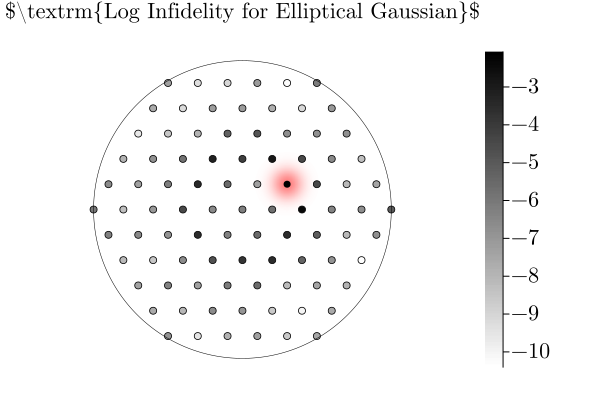

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


In [11]:
function gaussian(σ1, σ2, z)
    function func(x, y)
        if x^2 + y^2 > (1)^2
            minimum(loginfids)
        else
            y -= .1*sqrt(3)
            x -= .3
            (maximum(log.(10, z)) - minimum(loginfids))*exp(-x^2/σ1^2 + -y^2/σ2^2) + minimum(loginfids)
        end
    end
end



p = palette([:white, :black], 100);
scale = 1
loginfids = [log(10, Real(infid)) for infid in z2]
plot(heatmap(xs, ys, gaussian(σ1, σ2, z2); c=palette([:white, :red], 100), alpha=.5))
scatter!(scale*x, scale*y, marker_z = loginfids, c=p)
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Log Infidelity for Elliptical Gaussian}", fontfamily="Computer Modern", right_margin = 15Plots.mm)

In [10]:
scalefontsizes(1.3)
scalefontsizes(1.3)

┌ Warning: Keyword argument fillstyle not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :background_color, :yforeground_color_text, :yguidefontcolor, :seriesalpha, :seriescolor, :ztick_direction, :zlims, :overwrite_figure, :xguidefonthalign, :normalize, :linestyle, :xflip, :fillcolor, :ygrid, :colorbar_scale, :background_color_inside, :zguidefonthalign, :bins, :legend_font_valign, :yscale, :clims, :xtickfontcolor, :xguide, :fillalpha, :tick_direction, :yguidefontsize, :foreground_color, :xtickfonthalign, :x, :ytickfontrotation, :discrete_values, :ytick_direction, :xguidefontrotation, :ribbon, :tickfontrotation, :xdiscrete_values, :xgridstyle, :orientation, :gridstyle, :markersize, :legend_foreground_color, :camera, :xforeground_color_grid, :quiver, :zticks, :markerstrokecolor, :ztickfontrotation, :ztickfonthalign, :xtickfontsize, :levels, :zgridstyle, :foreground_color_border, :zguidefontvalign, :marker_z, :markerstrokealpha, :markeralpha, :tickfontvalign, :

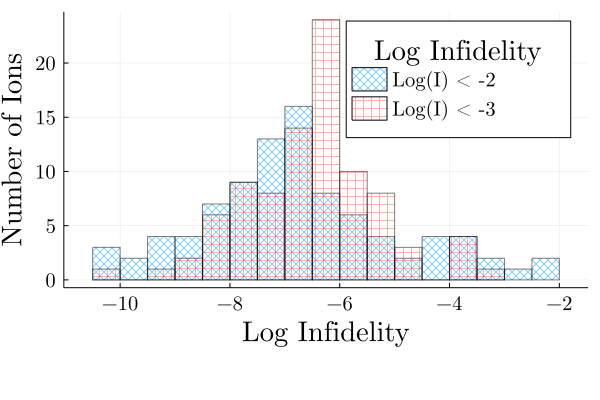

In [11]:
using Plots
histogram(log.(10, z2), alpha=.5, label="Log(I) < -2", legendfontsize=12, fillstyle=:x, nbins=20)
histogram!(log.(10, z1), alpha=.5, label="Log(I) < -3", xlabel="Log Infidelity", ylabel="Number of Ions", fontfamily="Computer Modern", bottom_margin = 15Plots.mm, legend=:topright, fillstyle=:+, nbins=20, legendtitle="Log Infidelity")